# Cleaning US Census Data

You just got hired as a Data Analyst at the Census Bureau, which collects census data and creates interesting visualizations and insights from it.

The person who had your job before you left you all the data they had for the most recent census. It is in multiple `csv` files. They didn't use pandas, they would just look through these `csv` files manually whenever they wanted to find something. Sometimes they would copy and paste certain numbers into Excel to make charts.

The thought of it makes you shiver. This is not scalable or repeatable.

Your boss wants you to make some scatterplots and histograms by the end of the day. Can you get this data into `pandas` and into reasonable shape so that you can make these histograms?

In [1]:
#load and concat the data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob

files = glob.glob('states*.csv')

states_list = []
for filename in files:
    data = pd.read_csv(filename)
    states_list.append(data)
    
us_census = pd.concat(states_list)

In [2]:
#inspect the data
print(us_census.columns)
print(us_census.dtypes)
print(us_census.head())

Index(['Unnamed: 0', 'State', 'TotalPop', 'Hispanic', 'White', 'Black',
       'Native', 'Asian', 'Pacific', 'Income', 'GenderPop'],
      dtype='object')
Unnamed: 0     int64
State         object
TotalPop       int64
Hispanic      object
White         object
Black         object
Native        object
Asian         object
Pacific       object
Income        object
GenderPop     object
dtype: object
   Unnamed: 0           State  TotalPop Hispanic   White   Black Native  \
0           0    Rhode Island   1053661   13.36%  74.33%   5.68%  0.35%   
1           1  South Carolina   4777576    5.06%  62.89%  28.75%  0.29%   
2           2    South Dakota    843190    3.24%  82.50%   1.42%  9.42%   
3           3       Tennessee   6499615    4.72%  73.49%  18.28%  0.23%   
4           4           Texas  26538614   38.05%  44.69%  11.65%  0.26%   

   Asian Pacific       Income            GenderPop  
0  3.25%   0.04%  $59,125.27       510388M_543273F  
1  1.25%   0.05%  $46,296.81     2322409M_2

## Regex to the Rescue

In [5]:
##Data wrangling & tidying
#Using Regex, turn Income column into a format that is ready for conversion into a numerical type
us_census.Income = us_census['Income'].replace('[\$,]', '', regex=True)
us_census['Income'] = pd.to_numeric(us_census['Income'])
print(us_census.Income.head())

0    59125.27
1    46296.81
2    51805.41
3    47328.08
4    55874.52
Name: Income, dtype: float64


In [6]:
#split GenderPop column into Men and Women columns
GenderPop_split = us_census['GenderPop'].str.split('_')
us_census['Men'] = GenderPop_split.str.get(0)
us_census['Women'] = GenderPop_split.str.get(1)

#convert both columns into numerical datatypes
us_census.Men = us_census['Men'].str[:-1]
us_census['Men'] = pd.to_numeric(us_census['Men'])
us_census.Women = us_census['Women'].str[:-1]
us_census['Women'] = pd.to_numeric(us_census['Women'])

print(us_census.Men.head())
print(us_census.Women.head())

0      510388
1     2322409
2      423477
3     3167756
4    13171316
Name: Men, dtype: int64
0      543273.0
1     2455167.0
2      419713.0
3     3331859.0
4    13367298.0
Name: Women, dtype: float64


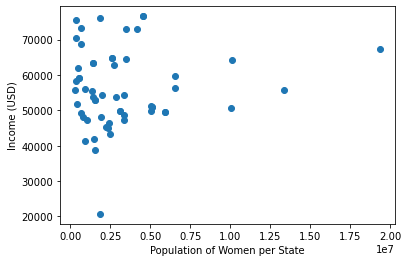

<Figure size 432x288 with 0 Axes>

In [7]:
##Data Visualization
plt.scatter(us_census.Women, us_census.Income)
plt.xlabel('Population of Women per State')
plt.ylabel('Income (USD)')
plt.show()
plt.clf()

In [8]:
#check Women column for nan values and fill if any
#print(us_census.Women.head)
us_census['Women'] = us_census['Women'].fillna(us_census['TotalPop'] - us_census['Men'])
#print(us_census['Women'])

In [10]:
#check dataset for duplicates
us_census.duplicated(subset = us_census.columns[1:])

#us_census.drop_duplicates(keep='first')
census = us_census.drop_duplicates(subset = us_census.columns[1:])
print(census.head())

   Unnamed: 0           State  TotalPop Hispanic   White   Black Native  \
0           0    Rhode Island   1053661   13.36%  74.33%   5.68%  0.35%   
1           1  South Carolina   4777576    5.06%  62.89%  28.75%  0.29%   
2           2    South Dakota    843190    3.24%  82.50%   1.42%  9.42%   
3           3       Tennessee   6499615    4.72%  73.49%  18.28%  0.23%   
4           4           Texas  26538614   38.05%  44.69%  11.65%  0.26%   

   Asian Pacific    Income            GenderPop       Men       Women  
0  3.25%   0.04%  59125.27      510388M_543273F    510388    543273.0  
1  1.25%   0.05%  46296.81    2322409M_2455167F   2322409   2455167.0  
2  1.02%   0.04%  51805.41      423477M_419713F    423477    419713.0  
3  1.41%   0.04%  47328.08    3167756M_3331859F   3167756   3331859.0  
4  3.67%   0.07%  55874.52  13171316M_13367298F  13171316  13367298.0  


12. Make the scatterplot again. Now, it should be perfect! Your job is secure, for now.

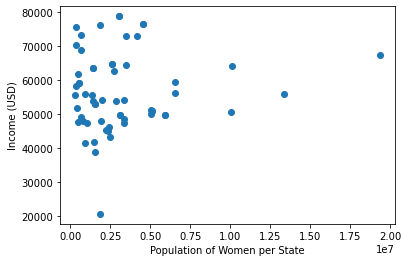

<Figure size 432x288 with 0 Axes>

In [11]:
#visualize Income vs. Women
plt.scatter(us_census.Women, us_census.Income)
plt.xlabel('Population of Women per State')
plt.ylabel('Income (USD)')
plt.show()
plt.clf()

In [12]:
##Data wrangling - Race data
#Using Regex, turn Race columns into a format that is ready for conversion into a numerical type
print(census.columns)

us_census.Hispanic = us_census['Hispanic'].replace('[,\%]', '', regex=True)
us_census.Hispanic = pd.to_numeric(us_census.Hispanic)
print(us_census.Hispanic.head())

us_census.White = us_census['White'].replace('[,\%]', '', regex=True)
us_census.White = pd.to_numeric(us_census.White)

us_census.Black = us_census['Black'].replace('[,\%]', '', regex=True)
us_census.Black = pd.to_numeric(us_census.Black)

us_census.Native = us_census['Native'].replace('[,\%]', '', regex=True)
us_census.Native = pd.to_numeric(us_census.Native)

us_census.Asian = us_census['Asian'].replace('[,\%]', '', regex=True)
us_census.Asian = pd.to_numeric(us_census.Asian)

us_census.Pacific = us_census['Pacific'].replace('[,\%]', '', regex=True)
us_census.Pacific = pd.to_numeric(us_census.Pacific)

#check dataset subset for duplicates and drop
census = us_census.drop_duplicates(subset = us_census.columns[1:])

Index(['Unnamed: 0', 'State', 'TotalPop', 'Hispanic', 'White', 'Black',
       'Native', 'Asian', 'Pacific', 'Income', 'GenderPop', 'Men', 'Women'],
      dtype='object')
0    13.36
1     5.06
2     3.24
3     4.72
4    38.05
Name: Hispanic, dtype: float64


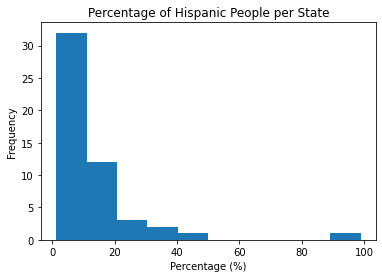

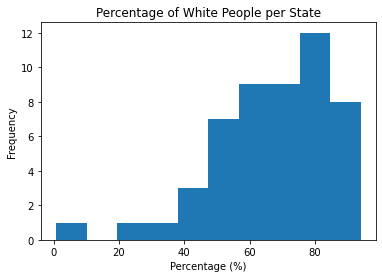

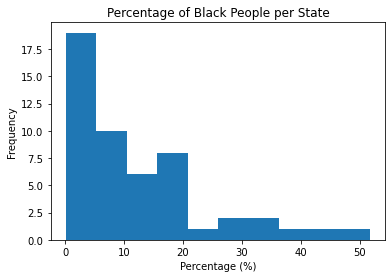

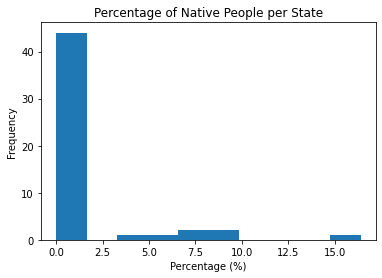

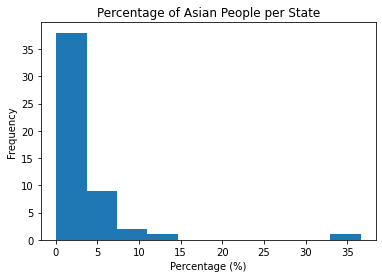

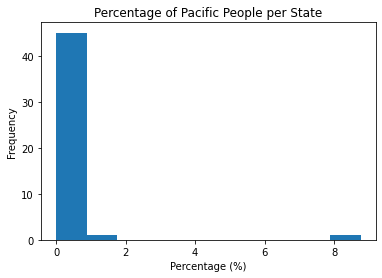

<Figure size 432x288 with 0 Axes>

In [13]:
#Visualize race columns
for race in ['Hispanic', 'White', 'Black', 'Native', 'Asian', 'Pacific']:
    plt.hist(census[race])
    plt.title('Percentage of {} People per State'. format(race))
    plt.xlabel('Percentage (%)')
    plt.ylabel('Frequency')
    plt.show()
    plt.clf()